# Localization

![](https://docs.google.com/drawings/d/e/2PACX-1vQ2SQeGNXvVybIzZW9Bp2cBFE2wQyrzh7vf6MCxzS-JAQvw-97nyyafxblGoWOAL5T8j9LwqcDWgXFV/pub?w=1121&h=204)

## Evironment Setup

In [14]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

x_noise = 3
kernel_size = 6
kernel = norm.pdf(np.arange(-kernel_size, kernel_size+1), scale=x_noise)
kernel /= np.sum(kernel)
n = 200
X = range(n)
z_noise = 0.006
width = 1560
env_map = np.array([280.5, 480.5, 1300.5])
sensor_spread = 25

robot_img = mpimg.imread('robot.png')
doors_img = mpimg.imread('doors.png')

(h, w, _) = robot_img.shape

def get_measurement(true_state):
    v = np.min(abs(env_map - true_state))
    return norm.pdf(v, scale=sensor_spread) + np.random.normal(scale=z_noise)

## Prediction Step
Here you will implement a function that takes the prior and incorporates a control signal. The control signal will be either move one space to the left or one space to the right. Important: the robot executes the control signal succesfully 90% of the time and remains in the same place 10% of the time.

In [15]:
def predict(prior, env_map, u):
    i = int(u*n/width + 0.5)
    posterior = np.roll(prior, i)
    if i > 0:
        posterior[0:i] = 0
    else:
        posterior[i:] = 0
    return np.convolve(posterior, kernel, mode='same')

## Correction Step

Here you will implement a function that takes the prior (probability distribution at the previous timestep) and incorporates a color sensor reading. **Important**: The color sensor gives a correct reading 80% of the time and an incorrect reading 20% of the time.

In [16]:
def measurement_probability(env_map, z):
    # create empty array
    prob = np.zeros(n)
    
    # for each bin in the histogram
    for i in range(prob.size):
        # compute the position this bin represents
        x = float(i)/n * width + 0.5
        # compute the expected measurement at this location
        expected = norm.pdf(np.min(abs(env_map - x)), scale=sensor_spread)
        # compute the measurement probability
        prob[i] = norm.pdf(expected - z, scale=z_noise)

    return prob

def correct(prior, prob):
    posterior = np.multiply(prior, prob)
    # normalize so probabilities sum to 1
    posterior = posterior / np.sum(posterior)
    
    return posterior

After you complete this, scroll down to results and run the initial belief and sense RED codeblocks. Check to make sure the distribution moves as you'd expect!

After you complete the move function, run all the codeblocks to see how your distribution changes. Does it shift as expected?

## Simulation

### Initial Belief

<BarContainer object of 200 artists>

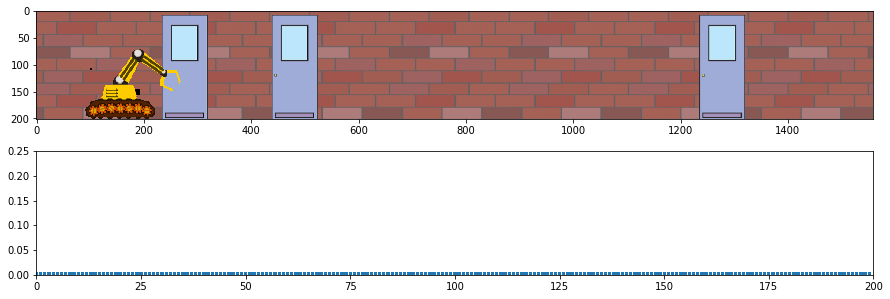

In [17]:
belief = np.array([1./n]*n)
true_state = 180.5

f, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,5))
x = int(true_state - w/2 + 0.5)
world = np.copy(doors_img)
world[70:70+h,x:x+w][robot_img[:,:,3]==1] = robot_img[robot_img[:,:,3]==1]
ax1.imshow(world)
ax2.set_ylim([0, 0.25]); ax2.set_xlim([0, n]); ax2.bar(X, belief)

### Move right

<BarContainer object of 200 artists>

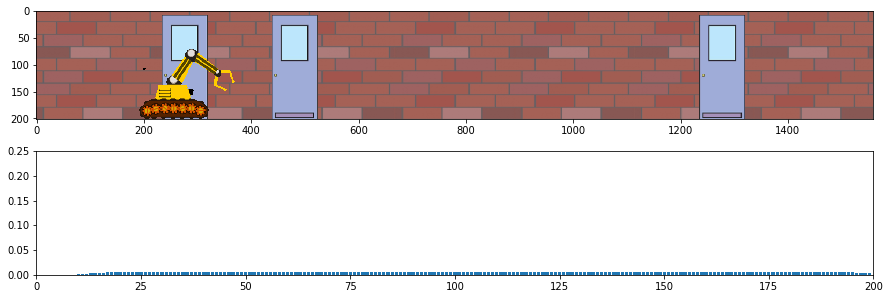

In [18]:
u = 100
true_state += u
belief = predict(belief, env_map, u + np.random.normal(scale=x_noise))

f, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,5))
x = int(true_state - w/2 + 0.5)
world = np.copy(doors_img)
world[70:70+h,x:x+w][robot_img[:,:,3]==1] = robot_img[robot_img[:,:,3]==1]
ax1.imshow(world)
ax2.set_ylim([0, 0.25]); ax2.set_xlim([0, n]); ax2.bar(X, belief)

### Sense for doors

<BarContainer object of 200 artists>

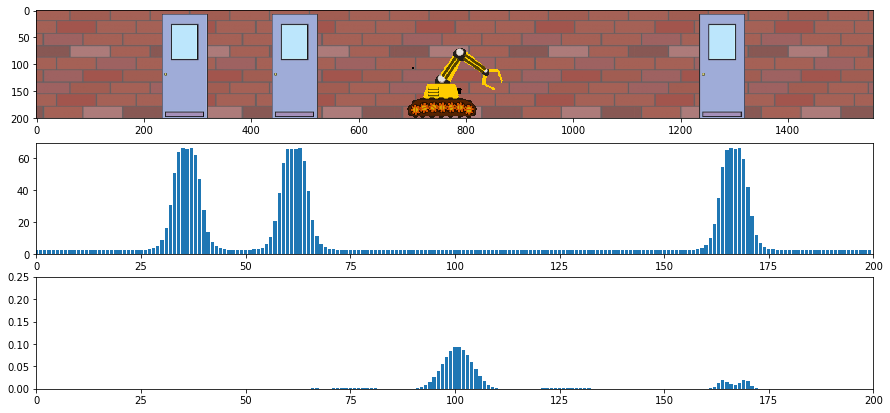

In [26]:
z = 0.015013100198017304 #get_measurement(true_state)
prob = measurement_probability(env_map, z)
belief = correct(belief, prob)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (15,7))
x = int(true_state - w/2 + 0.5)
world = np.copy(doors_img)
world[70:70+h,x:x+w][robot_img[:,:,3]==1] = robot_img[robot_img[:,:,3]==1]
ax1.imshow(world)
ax2.set_xlim([0, n]); ax2.bar(X, prob)
ax3.set_ylim([0, 0.25]); ax3.set_xlim([0, n]); ax3.bar(X, belief)

### Move right

<BarContainer object of 200 artists>

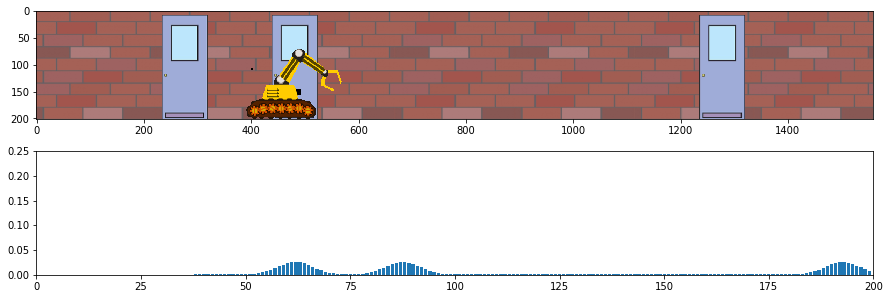

In [20]:
u = 200
true_state += u
belief = predict(belief, env_map, u + np.random.normal(scale=x_noise))

f, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,5))
x = int(true_state - w/2 + 0.5)
world = np.copy(doors_img)
world[70:70+h,x:x+w][robot_img[:,:,3]==1] = robot_img[robot_img[:,:,3]==1]
ax1.imshow(world)
ax2.set_ylim([0, 0.25]); ax2.set_xlim([0, n]); ax2.bar(X, belief)

### Sense for doors

<BarContainer object of 200 artists>

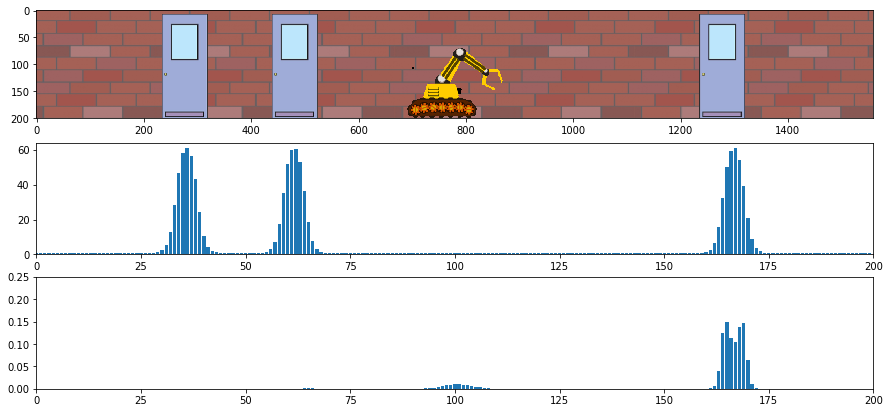

In [27]:
z = 0.018461221294540399 #get_measurement(true_state)
prob = measurement_probability(env_map, z)
belief = correct(belief, prob)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (15,7))
x = int(true_state - w/2 + 0.5)
world = np.copy(doors_img)
world[70:70+h,x:x+w][robot_img[:,:,3]==1] = robot_img[robot_img[:,:,3]==1]
ax1.imshow(world)
ax2.set_xlim([0, n]); ax2.bar(X, prob)
ax3.set_ylim([0, 0.25]); ax3.set_xlim([0, n]); ax3.bar(X, belief)

### Move right

<BarContainer object of 200 artists>

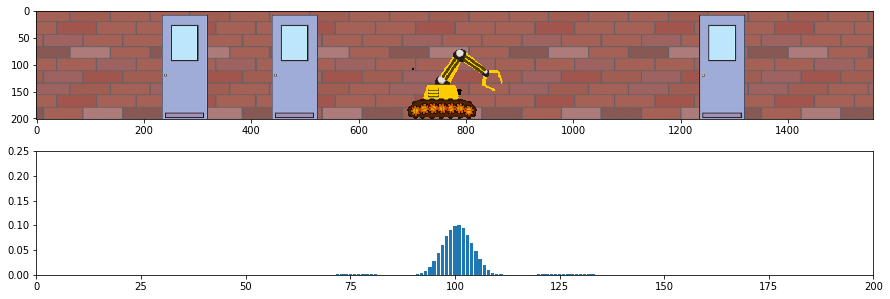

In [22]:
u = 300
true_state += u
belief = predict(belief, env_map, u + np.random.normal(scale=x_noise))

f, (ax1, ax2) = plt.subplots(2, 1, figsize = (15,5))
x = int(true_state - w/2 + 0.5)
world = np.copy(doors_img)
world[70:70+h,x:x+w][robot_img[:,:,3]==1] = robot_img[robot_img[:,:,3]==1]
ax1.imshow(world)
ax2.set_ylim([0, 0.25]); ax2.set_xlim([0, n]); ax2.bar(X, belief)

### Sense for doors

<BarContainer object of 200 artists>

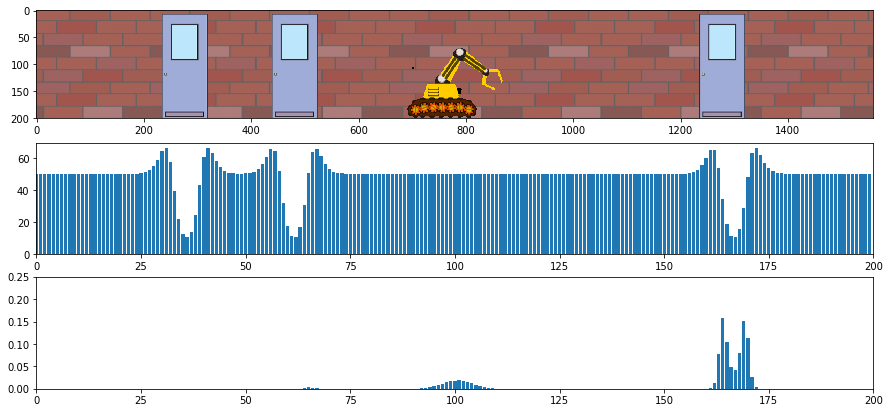

In [28]:
z = 0.0044673532993354101 # get_measurement(true_state)
prob = measurement_probability(env_map, z)
belief = correct(belief, prob)

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (15,7))
x = int(true_state - w/2 + 0.5)
world = np.copy(doors_img)
world[70:70+h,x:x+w][robot_img[:,:,3]==1] = robot_img[robot_img[:,:,3]==1]
ax1.imshow(world)
ax2.set_xlim([0, n]); ax2.bar(X, prob)
ax3.set_ylim([0, 0.25]); ax3.set_xlim([0, n]); ax3.bar(X, belief)